In [1]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json

This jupyter notebook is aiming at provide some programming skill for beginners.   

# Beginner machine learning project guidance in python

### Author : Niko Pang

When you start to code your own machine learning project, the first thing is to import relevant packages. In kindergarten you will usually be scared when you see the adult-level code,'cause they actually import so many packages!  
Feel free for that. You will never need to scrutinize all the packages syntex when you begin to code. They just did this in order to be beautiful. You can just import packages whenever you need them. 

Press M to write some comments, and use multiple # to indicate the title. Use space_space_enter to change to another line. If you meet some problems, try to breath and describe it clearly, then search it in google. You will always get the correct answer within the 20 page results.  

If you want to control the size and font of the markdown accurately,<font/><br>you may try </font><font color=#FF0000 size=2 face="Times New Roman">this way.
    

<div class="alert alert-block alert-info"><b>Tip:</b> Use blue boxes (alert-info) for tips and notes. If it’s a note, you don’t have to include the word “Note”. See 
    
    https://github.com/parulnith/10-Simple-hacks-to-speed-up-your-Data-Analysis-in-Python 
</div>

In [2]:
# But some basic packages you need to import, which will help you to load data.
import numpy as np
# from tabulate import tabulate   # You can also use this package for pro data vasualization.

import matplotlib.pyplot as plt
%matplotlib inline       
# Note:if you use `%matplotlib inline`, you do not need to `plt.show()` everytime.

import pandas as pd  
pd.set_option('max_colwidth',800)
import pandas_profiling

# If you want to time your program, you can ctrl+/ to activate the time package
# import time




When people think of Machine Learning, they often think of a program that is taking in data and spitting out predictions and insights. The process of performing Machine Learning often requires many more steps before and after the predictive analytics.

We try to think of the Machine Learning process as:

* Formulating a Question
* Finding and Understanding the Data
* Cleaning the Data and Feature Engineering
* Choosing a Model
* Tuning and Evaluating
* Using the Model and Presenting Results

See more in https://www.codecademy.com/articles/the-ml-process


## 0. Find your imperial question

We are interested in finding the forecast model to predict bank loss when default happens.  
It is a supervised learning problem, see  

https://scikit-learn.org/stable/supervised_learning.html  
  
for all possible ML algorithms we could use here.

##  Find data

Finding relative data is the first step for your project or research. On quantity side, it's always great to find huge quantity data. For the normal machine learning case, it's appropriate to have 1000+ data.  

If you want to do something fancy, you can collect your own data. As machine learning needs so much data, usually you need to study beautifulsoup and some web crawler skills

But in dimension side, even with the help of auto-algorithms to delete the unnecessary data, I still urge you not to have too much dimension(like 1000+) due to your computer capacity. Actually you can do that if you graduate from kindergarten and get the hand of cloud computing or parallel computing.

In [3]:
# load local data if you already have it
?pd.read_csv
?pd.read_excel
?pd.read_stata
?pd.read_sql
# and others …
# print pd. then use tab to check the optional and its 

It's okay if you download data and preprocess it in excel or other software. But in case that you need data from URL, it's convenient if you can input data without download to your local computer and proprecess it in Python.

Since not all of the website provide data API,let's use an local data case.

In [4]:
df = pd.read_excel('Banking_loss_events.xlsx')
df
# You can also check the data via 'df.head()' ,'df.tail()','tabulate(df) (need imported package)' or other methods.

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1398,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1399,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0
1400,Asia Pac,Retail Banking,z-LE-600,Rejected,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-06-19,2014-06-20,2014,230710.76,18456.8608,232300,8.0


## Explore data 

You can use package `qgrid` to quickly screen the data subset. 

In [5]:
import qgrid
# This is an useful package for first-step screen. See https://github.com/quantopian/qgrid

for qgrid_functions in dir(qgrid):
    print(qgrid_functions)   # show the inside function callable in qgrid

# other important command for qgrid
# qgrid.nbinstall(overwrite=True)
# qgrid.set_defaults(remote_js=True, precision=2)

QGridWidget
QgridWidget
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_jupyter_nbextension_paths
_version
disable
enable
grid
off
on
set_defaults
set_grid_option
show_grid
version_info


In [6]:
df_qgrid = qgrid.show_grid(df, show_toolbar=True)
df_qgrid
# qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
df_qgrid.get_changed_df()

# If you change the data in qgrid_excel above, do save it as
# df = df_qgrid.get_changed_df()

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1398,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1399,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0
1400,Asia Pac,Retail Banking,z-LE-600,Rejected,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-06-19,2014-06-20,2014,230710.76,18456.8608,232300,8.0


In [8]:
# After firstly scaling and screening the data, we use pandas_profiling package to check the data deeply.
# Then we'll decide what to do next. 
# Please activate the following code when you run this project at first time.

# df.profile_report()

In [9]:
# By the way, exporting the data report is also possible, if you don't want to see it in jupyter.
# profile = df.profile_report(title='Pandas Profiling Report')  
# profile.to_file("Banking data profiling.html")

C:\Users\langbo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\langbo\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


## Normal data exploration: similar steps in pandas

Note that you can also implement the similar functions in pandas. But I just don't like it because it is too slow and usually not that professional.  
If you have the same preference or you just want to excel this part and load back, just skip this 1.3 section.   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     1402 non-null   object        
 1   Business                   1402 non-null   object        
 2   Name                       1402 non-null   object        
 3   Status                     1402 non-null   object        
 4   Risk Category              1402 non-null   object        
 5   Risk Sub-Category          1402 non-null   object        
 6   Discovery Date             1402 non-null   datetime64[ns]
 7   Occurrence Start Date      1402 non-null   datetime64[ns]
 8   Year                       1402 non-null   int64         
 9   Net Loss                   1402 non-null   float64       
 10  Recovery Amount            1402 non-null   float64       
 11  Estimated Gross Loss       1402 non-null   int64         
 12  Recove

Ooops, we have plenty of 'object' features, which means they contain text and cannot put into our model directly. We need to do some transformation accordingly.  

Let's check the description statistics for numerical variables.

In [11]:
df.describe()

,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
count,1402.000000,1.402000e+03,1.402000e+03,1.402000e+03,1402.000000
mean,2011.019971,3.618860e+05,1.026123e+05,3.716211e+05,29.596291
std,2.239009,1.102039e+06,2.885603e+05,1.108328e+06,6.483356
min,2007.000000,-4.993440e+03,-1.947442e+03,-7.700000e+03,5.000000
25%,2009.000000,8.569924e+04,2.371198e+04,9.130000e+04,25.000000
50%,2011.000000,1.735251e+05,4.909423e+04,1.774000e+05,30.000000
75%,2013.000000,2.677119e+05,8.375998e+04,2.753000e+05,35.000000
max,2014.000000,1.168786e+07,3.774000e+06,1.169800e+07,40.000000


array([[<AxesSubplot:title={'center':'Estimated Gross Loss'}>,
        <AxesSubplot:title={'center':'Net Loss'}>],
       [<AxesSubplot:title={'center':'Recovery Amount'}>,
        <AxesSubplot:title={'center':'Recovery Amount (percent)'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

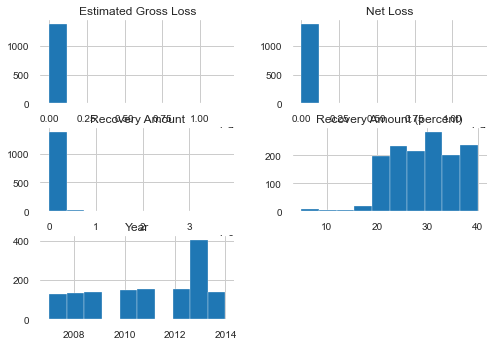

In [12]:
df.hist()
# only provides the bar charts for all numerical features in data 

In [13]:
df['Region'].unique()
# For catagorical feature, check how much catagories it has. 

array(['EMEA', 'North America', 'Asia Pac'], dtype=object)

In [14]:
# Other basic operations 

# Select the column 'Net Loss' with Series type
print(df['Net Loss'])
# Select the column 'Net Loss' with DataFrame type
print(df[['Net Loss']])
# Choose two columns with DataFrame type. Please note that there must be two square brackets
df[['Net Loss','Recovery Amount']]
# The column order will be returned according to the input order,
# you can change the column order via this code:
df1 = df[['Year', 'Occurrence Start Date']]
# Quickly select multiple rows (note that single row selection is not supported):
print(df1[:100])
# You can combine these method
df1[['Occurrence Start Date','Year']][:100]

0       296555.27
1        87472.47
2       229395.38
3       137925.29
4       292160.41
          ...    
1397    952743.86
1398    122813.21
1399    949052.11
1400    230710.76
1401    240558.72
Name: Net Loss, Length: 1402, dtype: float64
       Net Loss
0     296555.27
1      87472.47
2     229395.38
3     137925.29
4     292160.41
...         ...
1397  952743.86
1398  122813.21
1399  949052.11
1400  230710.76
1401  240558.72

[1402 rows x 1 columns]
    Year Occurrence Start Date
0   2007            2007-01-02
1   2007            2007-01-05
2   2007            2007-01-06
3   2007            2007-01-11
4   2007            2007-01-14
..   ...                   ...
95  2007            2007-10-07
96  2007            2007-10-08
97  2007            2007-10-13
98  2007            2007-10-15
99  2007            2007-10-18

[100 rows x 2 columns]


,Occurrence Start Date,Year
0,2007-01-02,2007
1,2007-01-05,2007
2,2007-01-06,2007
3,2007-01-11,2007
4,2007-01-14,2007
...,...,...
95,2007-10-07,2007
96,2007-10-08,2007
97,2007-10-13,2007
98,2007-10-15,2007


# Data Preprocessing

Normal steps:

1. Dealing with missing data
    - Identifying missing values in tabular data
    - Eliminating samples or features with missing values
    - Imputing missing values
    - Understanding the scikit-learn estimator API  
  
  
2. Handling categorical data]
    - Nominal and ordinal features
    - Mapping ordinal features
    - Encoding class labels
    - Performing one-hot encoding on nominal features
  
   
3. Partitioning a dataset into a separate training and test set  

  
4. Bringing features onto the same scale
  
  
5. Selecting meaningful features
    - L1 and L2 regularization as penalties against model complexity]
    - A geometric interpretation of L2 regularization
    - Sparse solutions with L1 regularization
    - Sequential feature selection algorithms
   
   
   
6. Assessing feature importance with Random Forests

## Artificial preprocessing

Let's go back to our data_profile report. We are gonna solve the question listed here one by one.  
We recommend you to spend at least 3 minutes in this report, because this step contains too many objective factors and crucial for the accuracy and interpretability of the final model.

In [15]:
from IPython.display import IFrame
IFrame('Banking data profiling.html', width=800, height=450)

Our data contains 13 features, 6 are categories, 5 are numbers, 2 are dates. The report gives us some warnings. Now let's analyze these problems.  
  
1. Our data has no missing values, which means we don't need to `df.fillna()`. It is the only good news.  

   
2. There exists one duplicate row. After checking background we are convinced that we should delete this data. We can use `df.drop_duplicates` to carry out.  

    
3. You can see the high correlation between two groups of variables:`Recovery Amount + Net Loss + Estimated Gross Loss`, `Risk Sub-Category + Risk Category`.  We should check them and decide to easily delete or use some dimension reduction method(PCA, Lasso, etc) here.    
    
    Note: We must avoid pure collinearity in y variable. Although X features' multicollinearity is allowed in particular machine learning models, it is always a dominate strategy to treat them beforehand. Here we don't have a large set of features, so we can just simply delete some of them instead of using feature engineering methods.   
  
  
4. `Name` has a high cardinality. If some category features have too many categories, it is very difficult to get one-hot coding(transfer to multiple 01 variables) later. 
   
   `Name` here is an unstructured data. We can just waive it, or try something else objectively. 
  
   
5. For date_time features, usually we need to check if it's better to subtract them and extract the useful time length. You can recheck in `qgrid` table. Here the data labels are Discover Date and Occurrence Start Date. Also notice that we've already had the `Year` feature. So it is necessary to make a concrete analysis based on the facts of background and data.   
  
  
6. For continuous numerical features, we can still do some transformation here. If you want to make your model more robust, you can conduct discretization and get category features. Also, you can make up some objective feature with strong intuition meaning or good performance. We don't need this step here.

In [16]:
# 1. delete duplicate data

df = df.drop_duplicates()
# After you drop the data, remember to re-index to fill the blank.
index = list(np.arange(len(df)))
df['index'] = index
df = df.sort_values(by=['index'], ascending=(True))
df.set_index('index',inplace=True)
df

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
index,,,,,,,,,,,,,
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1397,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1398,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0


In [17]:
# 2. deal with collinearity in numerical method

## 2.1 numerical features
df.corr()

,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
Year,1.000000,-0.010876,-0.003261,-0.009090,0.023309
Net Loss,-0.010876,1.000000,0.965853,0.993862,-0.063420
Recovery Amount,-0.003261,0.965853,1.000000,0.959541,0.020560
Estimated Gross Loss,-0.009090,0.993862,0.959541,1.000000,-0.065719
Recovery Amount (percent),0.023309,-0.063420,0.020560,-0.065719,1.000000


In [18]:
# Note that the [Recovery Amount + Net Loss + Estimated Gross Loss + Recovery Amount (percent)] are all appropriate to be our y variable. 
# We just pick `Recovery Amount (percent)` here, because it is a ratio and usually more objective.
# But we are also interested in the actual loss scale, so we just keep net loss in our data for further use. 

df = df.drop(columns=['Estimated Gross Loss','Recovery Amount'])
df.head()
# Successfully delete the two variables.
# Note: A shortage of pandas, compared to excel, is that you have to be cautious that you always need to load back the operation to df.

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount (percent)
index,,,,,,,,,,,
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,31.0


In [19]:
## 2.2 categorical features
df_sub = df[['Risk Category','Risk Sub-Category']]
df_sub_qgrid = qgrid.show_grid(df_sub, show_toolbar=True)
df_sub_qgrid
# Let's play with it to see if we can conclude the pattern.

C:\Users\langbo\anaconda3\lib\site-packages\pandas\io\json\_table_schema.py:82: UserWarning: Index name of 'index' is not round-trippable
  warnings.warn("Index name of 'index' is not round-trippable")


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
# The Chi-Square Uniformity Test for these two category variables are high.
# If you are doing some regression and want to keep the parameters' explanatory power, you should waive one of them.
df_reg = df.drop(columns=['Risk Sub-Category'])
# However, these two features are not perfectly correlated. As accurarcy is often better than everything in machine learning, we decide to keep them here.

In [21]:
# 3. deal with time features

df['timediff'] = (df['Occurrence Start Date'] - df['Discovery Date'])
df['timediff'] = df['timediff'].astype('timedelta64[D]')
df['timediff'].describe()

count    1401.000000
mean       -2.320485
std        80.899678
min     -1887.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       362.000000
Name: timediff, dtype: float64

In [22]:
# In average, the bank will be able to discover the default occurence after 3 days. Sometimes bank can be clever to forecast ahead or super stupid.
# Look at the ptcl, you'll find actually the majority of bank can figure out the default 1-3 days before it actually occurs.
# It is a really interesting feature, so we decide to keep it and waive `Occurrence Start Date` accordingly.
# We also keep the `Discovery Date` to check the stock variables.
df = df.drop(columns='Occurrence Start Date')
df['Discovery Date'] = df['Discovery Date'].values.astype('float')

df1.head()

,Year,Occurrence Start Date
0,2007,2007-01-02
1,2007,2007-01-05
2,2007,2007-01-06
3,2007,2007-01-11
4,2007,2007-01-14


In [23]:
# 4. treat `Name` feature
# Before we delete it, let's make sure if it contains some of important message:
df_name = df[['Name']]
qgrid.show_grid(df_name, show_toolbar=True)
# Wait a second. It actually implied a binary classification: z-LE and LE-06.
# It is better to extract this out and make use of it.

C:\Users\langbo\anaconda3\lib\site-packages\pandas\io\json\_table_schema.py:82: UserWarning: Index name of 'index' is not round-trippable
  warnings.warn("Index name of 'index' is not round-trippable")


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
# df = (df['Name Class',ii] = 1 if 'LE-06' in df['Name'][ii] else 0)
# But when you do element-wise operations, it is likely that you are converting the copy of df instead of the original df.
# To avoid this bug, use an outside list to store the operations we made and input background afterwards 
# The following codes may look stupid, if you have better idea please share with me.

name = []
for ii in range(1401):
    if ('z-LE' in df['Name'][ii]):
        name.append(1)
    else:
        name.append(0)

df['Name Class'] = name 
# 0:type LE-06     1:type z-LE 
df = df.drop(columns='Name')
df

,Region,Business,Status,Risk Category,Risk Sub-Category,Discovery Date,Year,Net Loss,Recovery Amount (percent),timediff,Name Class
index,,,,,,,,,,,
0,EMEA,Retail Brokerage,Under Review,"Clients, Products and Business Practices",Product Flaws,1.167610e+18,2007,296555.27,28.0,1.0,0
1,North America,Retail Banking,Approved,"Execution, Delivery and Process Management",Trade Counterparties,1.167782e+18,2007,87472.47,31.0,2.0,0
2,Asia Pac,Retail Brokerage,Not Started,"Clients, Products and Business Practices",Advisory Activities,1.167869e+18,2007,229395.38,26.0,2.0,0
3,EMEA,Retail Banking,In Progress,"Clients, Products and Business Practices",Product Flaws,1.168214e+18,2007,137925.29,25.0,3.0,0
4,North America,Trading and Sales,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,1.168560e+18,2007,292160.41,31.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1396,EMEA,Trading and Sales,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,1.384474e+18,2013,952743.86,30.0,2.0,1
1397,EMEA,Trading and Sales,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,1.390522e+18,2014,122813.21,35.0,1.0,1
1398,North America,Trading and Sales,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,1.395533e+18,2014,949052.11,22.0,3.0,1


After all the steps before, we eventually finish the objective steps in data preprocessing.   
Now we can implement the routines, which will be very easy if you have basic knowledge.

## Routine preprocessing

Here are some advice limited on my knowledge. I will be grateful if you can share better idea me via Dingtalk.

1. For a categorical feature: if its rank (eg,0-5 score) make sense, then hold it. If not, such as the feature `Region` here, we will transfer them to multiple 0-1 dummy variables for every category inside through `pd.get_dummy` one-hot coding.  
  
  
2. For numerical features: we will only do feature scaling here. Here we just `StandardScaler()` all the x features and let y alone. If you realize that you should make some useful factors, you should do it in `Artificial preprocessing` part based on your own understanding of the project.  
  
  
3. Split the data to training/test set and prepare for ML algorithm. Skip this step if your data is already divided. 
  
  
4. Other methods.(We don't need them here)

In [25]:
# Automated recognization of categorical feature in Python : R-factor function
# 1. one hot coding
# ?pd.get_dummies
# `pd.get_dummies` will auto-delete the original categorical features,so we use df_ml here to ensure that our procedures are reversible

df_ml = pd.get_dummies(df, drop_first=False)
df_ml
# All the categorical features are transfered now. We can see finally we get pure numerical features.
# Cheers!

,Discovery Date,Year,Net Loss,Recovery Amount (percent),timediff,Name Class,Region_Asia Pac,Region_EMEA,Region_North America,Business_Agency Services,...,Risk Sub-Category_Safe Environment,"Risk Sub-Category_Selection, Sponsorship and Exposure","Risk Sub-Category_Suitability, Disclosures and Fiduciary",Risk Sub-Category_Systems Security,Risk Sub-Category_Theft and Fraud,Risk Sub-Category_Trade Counterparties,Risk Sub-Category_Transaction/Data Management,Risk Sub-Category_Unauthorized Activity,Risk Sub-Category_Vendors and Suppliers,Risk Sub-Category_Willful Damage
index,,,,,,,,,,,,,,,,,,,,,
0,1.167610e+18,2007,296555.27,28.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.167782e+18,2007,87472.47,31.0,2.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.167869e+18,2007,229395.38,26.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.168214e+18,2007,137925.29,25.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.168560e+18,2007,292160.41,31.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.384474e+18,2013,952743.86,30.0,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1397,1.390522e+18,2014,122813.21,35.0,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1398,1.395533e+18,2014,949052.11,22.0,3.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# 2. standardize all X features
from sklearn.preprocessing import StandardScaler
# alternative:from sklearn.preprocessing import MinMaxScaler


print(df_ml.columns)


Index(['Discovery Date', 'Year', 'Net Loss', 'Recovery Amount (percent)',
       'timediff', 'Name Class', 'Region_Asia Pac', 'Region_EMEA',
       'Region_North America', 'Business_Agency Services',
       'Business_Asset Management', 'Business_Commercial Banking',
       'Business_Corporate Finance', 'Business_Retail Banking',
       'Business_Retail Brokerage', 'Business_Trading and Sales',
       'Status_Approved', 'Status_In Progress', 'Status_Not Started',
       'Status_Rejected', 'Status_Under Review',
       'Risk Category_Business Disruption and System Failures',
       'Risk Category_Clients, Products and Business Practices',
       'Risk Category_Damage to Physical Assets',
       'Risk Category_Employment Practices and Workplace Safety',
       'Risk Category_Execution, Delivery and Process Management',
       'Risk Category_External Fraud', 'Risk Category_Internal Fraud',
       'Risk Sub-Category_Advisory Activities',
       'Risk Sub-Category_Customer Intake and Documen

In [27]:
y = df_ml['Recovery Amount (percent)']
X = df_ml[['Discovery Date','Year','timediff','Name Class','Region_Asia Pac', 'Region_EMEA', 'Region_North America',
       'Business_Agency Services', 'Business_Asset Management',
       'Business_Commercial Banking', 'Business_Corporate Finance',
       'Business_Retail Banking', 'Business_Retail Brokerage',
       'Business_Trading and Sales', 'Status_Approved', 'Status_In Progress',
       'Status_Not Started', 'Status_Rejected', 'Status_Under Review',
       'Risk Category_Business Disruption and System Failures',
       'Risk Category_Clients, Products and Business Practices',
       'Risk Category_Damage to Physical Assets',
       'Risk Category_Employment Practices and Workplace Safety',
       'Risk Category_Execution, Delivery and Process Management',
       'Risk Category_External Fraud', 'Risk Category_Internal Fraud',
       'Risk Sub-Category_Advisory Activities',
       'Risk Sub-Category_Customer Intake and Documentation',
       'Risk Sub-Category_Customer/Client Account Management',
       'Risk Sub-Category_Disaster and other events',
       'Risk Sub-Category_Diversity and Discrimination',
       'Risk Sub-Category_Employee Relations',
       'Risk Sub-Category_Improper Business or Market Practices',
       'Risk Sub-Category_Infrastructure and Systems',
       'Risk Sub-Category_Product Flaws',
       'Risk Sub-Category_Reporting and Disclosure',
       'Risk Sub-Category_Safe Environment',
       'Risk Sub-Category_Selection, Sponsorship and Exposure',
       'Risk Sub-Category_Suitability, Disclosures and Fiduciary',
       'Risk Sub-Category_Systems Security',
       'Risk Sub-Category_Theft and Fraud',
       'Risk Sub-Category_Trade Counterparties',
       'Risk Sub-Category_Transaction/Data Management',
       'Risk Sub-Category_Unauthorized Activity',
       'Risk Sub-Category_Vendors and Suppliers',
       'Risk Sub-Category_Willful Damage']]
# I am a lazy person. OFC you can also select by deduction method.
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)

In [28]:
# 3. train/test split
# Usually if you want to predict, this step should process beforehand the standardization step.
# Now we just conduct regression analysis. Thus, no need to do that.


# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_test_std = sc_X.fit_transform(X_test)
# X_train_std = sc_X.fit_transform(X_train)

## Machine learning algorithm part

We are very happy if we still have you here. The following codes are the core of machine learning techniques, but once you know how to choose the algorithms it will be very simple. In this class we do not require parameter tuning, thus it won't cost too much time for us.  
  
Know more about how to choose ml algorithms, see https://docs.microsoft.com/en-us/azure/machine-learning/how-to-select-algorithms
  
https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60

In [29]:
IFrame('https://docs.microsoft.com/en-us/azure/machine-learning/how-to-select-algorithms',width=600, height=450)

We are in a regression problem. So we can use these following methods:

- Boosted Decision Tree Regression
- Decision Forest Regression
- Fast Forest Quantile Regression
- Linear Regression
- Neural Network Regression
- Poisson Regression
- and more  

When the method is chosen, you can go to sklearn official file to search for code to implement them. For economics and finance students who may be familiar with OLS and other model, you can view Machine Learning as applied advanced CS&Stat techniques in regression.

In [30]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p sklearn

Sebastian Raschka 
last updated: 2020-08-16 

sklearn 0.23.2


In [37]:
# 1. linear regression
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.linear_model import LinearRegression

y_std = sc_X.fit_transform(y.values.reshape(-1,1))

slr = LinearRegression()
slr.fit(X_std, y_std)
y_pred = slr.predict(X_std)
print('Slope:' , slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE: %.3f,'  % mean_squared_error(y_std, y_pred))
print('R^2: %.3f,'  % r2_score(y_std, y_pred))

# save your model
import joblib

joblib.dump(slr, "train_model.m")
# load back and run
slr_1 = joblib.load("train_model.m")
slr_1.predict(X_std)

Slope: [[-5.60522358e-01  5.51453159e-01 -4.05525536e-03  2.54288714e-02
  -2.47923360e+13 -2.81662228e+13 -2.99685511e+13  6.88210094e+12
   5.76964627e+12  1.12051307e+13  4.58125338e+12  1.82726490e+13
   8.18248232e+12  1.29230957e+13 -2.67275986e+12 -2.67275986e+12
  -3.25044027e+12 -2.12027980e+12 -3.02732732e+12  1.07174533e+13
  -1.01720338e+13  1.41053568e+13 -6.15370441e+11  1.30759196e+12
   4.52722297e+12  1.74126252e+12  6.05646532e+12  2.54096815e+11
   1.82516051e+11 -1.06957620e+13  9.28611660e+11  9.01544420e+11
   4.59822088e+12 -1.02288393e+13  6.05646532e+12  3.44091120e+11
   1.07537263e+12  4.30434625e+12  4.30434625e+12 -1.66368654e+12
  -2.55135880e+12  3.01774041e+11  1.78248445e+11 -6.76965732e+11
   2.46885716e+11 -8.73931115e+12]]
Intercept: -0.003
MSE: 0.867,
R^2: 0.133,


array([[ 0.05299323],
       [-0.00547845],
       [ 0.15162604],
       ...,
       [-1.02409417],
       [-1.43669183],
       [-1.38981683]])

In [38]:
# 2. polynomial regression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_std)

lr.fit(X_quad, y_std)

y_quad_pred = lr.predict(X_quad)
print('R^2 for quadratic: %.3f' % (r2_score(y_std, y_quad_pred)))

R^2 for quadratic: 0.391


In [39]:
# 3. regularized methods for regression(Lasso,Ridge)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_std, y_std)
y_pred = lasso.predict(X_std)
print(lasso.coef_)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
# …… you can do the same operations

[ 0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.20769451 -0.        ]


In [40]:
# 4. Fitting a robust regression model using RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X_std, y_std)
print('Slope: ', ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
y_pred = ransac.predict(X_std)

print('MSE: %.3f,'  % mean_squared_error(y_std, y_pred))
print('R^2: %.3f,'  % r2_score(y_std, y_pred))

Slope:  [-5.61161057e-01  5.57936593e-01  1.40616819e-02  1.99440291e-02
 -1.28228696e+13 -1.45678811e+13 -1.55000651e+13 -2.12403458e+10
 -1.78069579e+10 -3.45825864e+10 -1.41392006e+10 -5.63951890e+10
 -2.52537350e+10 -3.98847710e+10  3.45414710e+12  3.45414710e+12
  4.20071365e+12  2.74014828e+12  3.91237314e+12  5.99518728e+12
 -9.81508285e+12  2.96477696e+12  8.96596782e+12 -1.46799020e+13
 -8.83108837e+12 -3.39661715e+12  6.28343032e+12  8.79185705e+12
  6.31513242e+12 -1.85746624e+12 -4.04491942e+12 -3.92701782e+12
  4.77053841e+12 -5.11623403e+12  6.28343032e+12  1.19056980e+13
 -4.68419237e+12  4.46565088e+12  4.46565088e+12  7.55918041e+12
  1.15924370e+13  1.04415092e+13  6.16747143e+12  3.07588358e+12
  8.54234999e+12 -1.51770162e+12]
Intercept: -0.002
MSE: 0.866,
R^2: 0.134,


<div class="alert alert-block alert-danger">  
Note: sklearn is not a professional package for regression and econometric methods.     
    Here we just show the code and skip some steps(eg,elimination of Multicollinearity, intuition and significance of parameters).  
    There should be more analysis if you want to conduct an expert regression.
</div>

In [41]:
# 5. Boosted Decision Tree Regression
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X_std, y)
regr_2.fit(X_std, y)

y_1 = regr_1.predict(X_std)
y_2 = regr_2.predict(X_std)

# Then you can value the results based on judgements below.

In [42]:
# 6. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_std, y_std)
y_pred = forest.predict(X_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.135 


In [43]:
# 7. Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_std, y_std)
y_pred = regr.predict(X_std)

regr.score(X_std, y_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE : 0.762 


In [53]:
# 8. Bayesian Ridge Regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

from sklearn.linear_model import BayesianRidge

clf = BayesianRidge(compute_score=True)
clf.fit(X_std, y_std)
print(clf.scores_,clf.coef_,)
y_pred = clf.predict(X_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

[-2024.03302938 -1955.00330086 -1941.28233448 -1940.67244293
 -1940.64764189 -1940.64646627 -1940.64640867 -1940.64955853] [-0.02204476  0.02068521  0.05352692  0.01768759 -0.02600718  0.02350483
 -0.00057606  0.04227489  0.01862002 -0.00454084 -0.04751454 -0.04422456
  0.01671702  0.04190165 -0.00563146 -0.02148489  0.00886374  0.00225094
  0.01284692 -0.00149836  0.00150456  0.01208387  0.01092813 -0.04571614
  0.04269785 -0.01577275  0.00083842 -0.01373459  0.05078442  0.0222992
  0.00965412  0.00319452 -0.01257383 -0.00149836 -0.01146163  0.06123479
  0.00561683  0.00501578  0.02725844 -0.01195682  0.03299104  0.01618286
  0.01347941  0.04986948 -0.23441454 -0.00822607]


C:\Users\langbo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
# 9. (k) Nearest Neighbors regression
from sklearn import neighbors

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights).fit(X_std, y_std)
    y_pred = knn.predict(X_std)

    print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

MSE : 0.663 
MSE : 0.017 


In [55]:
# *10. Fast Forest Quantile Regression
# I cannot find QRFs(Quantile Regression Forest) implementation in sklearn. 
# To carry out this method, you may try skgarden, TensorFlow or Azure ai.

Limited on my knowledge, I only list the basic operations in this linear_model_family. You may find some similar patterns to conduct these models, but actually there are many new ideas.   

There exists many hyperparameters to adjust these models, as well as different types of criteria to evaluation methods for your `y_pred` result. To get more advanced operation in sklearn, I strongly advice you to read the official cases from https://scikit-learn.org/stable/auto_examples/index.html. We also provide some cases for you to get the hand of the code.

# Classification problem

For economics and finance students, it is likely that ML algorithms in classification problems will shock you. Because it did provide some new approaches to the problem, which requires the support of computer memory and nonlinear solvers.

Let's consider a real-world question:  
You are the leader of the bank risk management department. Suppose you want to securitize some low-quality account-receivables and sell in the market. The requirement is that it has huge possibility to reach 30% recovery amount ratio.  
  
Now, due to the additional information from the knowledge, you can discrete the y into two parts based on the 30% threshold. And then we get a classification problem: $ y|y<0.3 = 0, y|y \geq 0.3 = 1. $ Besides, we will choose precision rate to evaluate the model

In [69]:
df_ml['Recovery Amount (percent)_bin'] = df_ml['Recovery Amount (percent)']
y = df_ml['Recovery Amount (percent)_bin']
y

index
0       28.0
1       31.0
2       26.0
3       25.0
4       31.0
        ... 
1396    30.0
1397    35.0
1398    22.0
1399     8.0
1400     8.0
Name: Recovery Amount (percent)_bin, Length: 1401, dtype: float64

In [70]:
y[y<30] = 1
y[y>=30] = 0
# Don't miss up the 0-1 value!
# It should be better way to conduct that. 

y
# y is changed now. We will use the same X to predict it.

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index
0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1396    0.0
1397    0.0
1398    1.0
1399    1.0
1400    1.0
Name: Recovery Amount (percent)_bin, Length: 1401, dtype: float64

In [71]:
# Now we are forecast on forecasting whether y is 1 or 0. 
# So it is important to split X to train/test set.
# For better speed, we use dimension reduction(feature engineering) method

from sklearn.decomposition import PCA
# alternative: from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split

pca = PCA(n_components=8)
#lda = LatentDirichletAllocation(n_components=5, random_state=0)

X_pca = pca.fit_transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Be sure to split before you standardize X.
X_test_std = sc_X.fit_transform(X_test)
X_train_std = sc_X.fit_transform(X_train)

Nearest Neighbors _score: 0.5083135391923991
[[119  85]
 [122  95]]


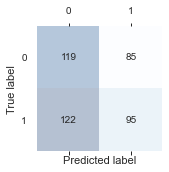

Precision: 0.494
Recall: 0.583
F1: 0.535
Linear SVM _score: 0.4845605700712589
[[204   0]
 [217   0]]


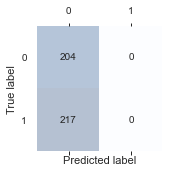

Precision: 0.485
Recall: 1.000
F1: 0.653
RBF SVM _score: 0.5320665083135392
[[134  70]
 [127  90]]


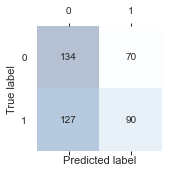

Precision: 0.513
Recall: 0.657
F1: 0.576
Gaussian Process _score: 0.4845605700712589
[[204   0]
 [217   0]]


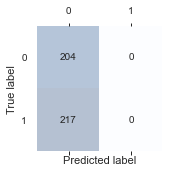

Precision: 0.485
Recall: 1.000
F1: 0.653
Decision Tree _score: 0.49643705463182897
[[147  57]
 [155  62]]


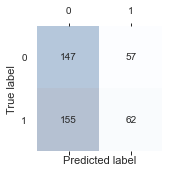

Precision: 0.487
Recall: 0.721
F1: 0.581
Random Forest _score: 0.5558194774346793
[[132  72]
 [115 102]]


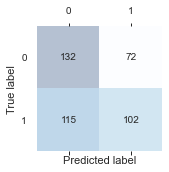

Precision: 0.534
Recall: 0.647
F1: 0.585
Neural Net _score: 0.47980997624703087
[[156  48]
 [171  46]]


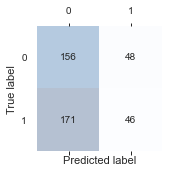

Precision: 0.477
Recall: 0.765
F1: 0.588
AdaBoost _score: 0.5130641330166271
[[132  72]
 [133  84]]


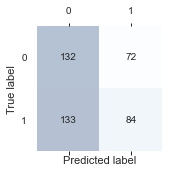

Precision: 0.498
Recall: 0.647
F1: 0.563
Naive Bayes _score: 0.49406175771971494
[[131  73]
 [140  77]]


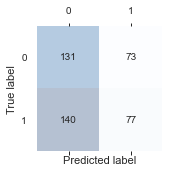

Precision: 0.483
Recall: 0.642
F1: 0.552
QDA _score: 0.4821852731591449
[[138  66]
 [152  65]]


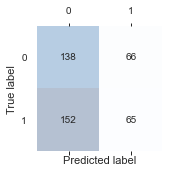

Precision: 0.476
Recall: 0.676
F1: 0.559


In [72]:
# Tired of running these algorithms one by one, this time we decide to cluster them and run together.
# I provide a snippets(.json) for you, in which you can click the snippets and go through this process easily.

# If your CPU is not fine, you can run this code and have a sleep now. Good night, sweetie！
# How to select ML classifier? It depends.


# model packages
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# evaluation packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedKFold

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="rbf",gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(max_depth=8, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name,'_score:',score)
    y_pred = clf.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    
    # plot confusion matrix
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/xxmethod.png', dpi=300)
    plt.show()

    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
    # plot ROC-AUC curve
# Here I want to draw another plot, in which you add a line in every loop as well as plot one first matrix.
# I don't know how to solve this in matplotlib
    
#     fig = plt.figure(figsize=(7, 5))

#     mean_tpr = 0.0
#     mean_fpr = np.linspace(0, 1, 100)
#     all_tpr = []

#     for i, (train, test) in enumerate(cv):
#         probas = clf.fit(X_train_pca[train],
#                             y_train[train]).predict_proba(X_train_pca[test])

#         fpr, tpr, thresholds = roc_curve(y_train[test],
#                                         probas[:, 0],
#                                         pos_label=0)
#         mean_tpr += interp(mean_fpr, fpr, tpr)
#         mean_tpr[0] = 0.0
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr,
#                 tpr,
#                 label='ROC fold %d (area = %0.2f)'
#                       % (i+1, roc_auc))

# plt.plot([0, 1],
#          [0, 1],
#          linestyle='--',
#          color=(0.6, 0.6, 0.6),
#          label='random guessing')

# mean_tpr /= len(cv)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, 'k--',
#          label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
# plt.plot([0, 0, 1],
#          [0, 1, 1],
#          linestyle=':',
#          color='black',
#          label='perfect performance')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.legend(loc="lower right")

# plt.tight_layout()
# # plt.savefig('images/06_10.png', dpi=300)
# plt.show()

    

It's very disappointing that your model won't give you a good performance about precision rate (only slightly better than 50%). This is life, my honey. You'd better try to find some other advanced models, or to collect more information for this question. You should be glad that you saw such bad predictions in a tutorial, not in your work. I will definitely not show this result to my boss if I get this. 

# Summary

We have finished the algorithms in supervise learning.  
I hope you have generally understood the general steps of a machine learning project.   
We provide examples of three difficulty levels, you can find and run them in other folders.   


Have fun, stay healthy and live a happy life.